In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# plots appear inline in jupyter
%matplotlib inline

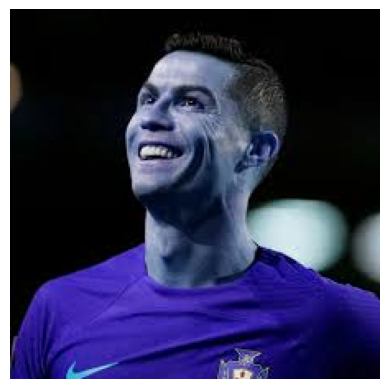

In [51]:
img = cv2.imread("C:/Users/Jui Sonawane/Desktop/FDIP/ronaldo.jpeg")
plt.axis("off")
plt.imshow(img)

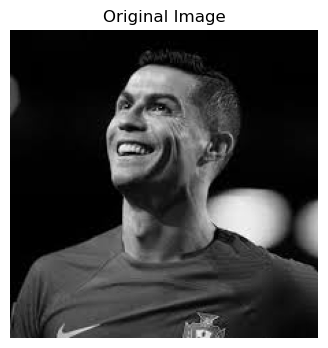

In [15]:
img = cv2.imread("C:/Users/Jui Sonawane/Desktop/FDIP/ronaldo.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

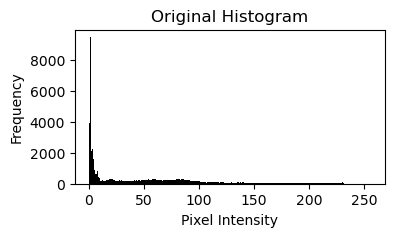

In [27]:
# Plot the histogram of the original image
plt.figure(figsize=(4,2))
plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


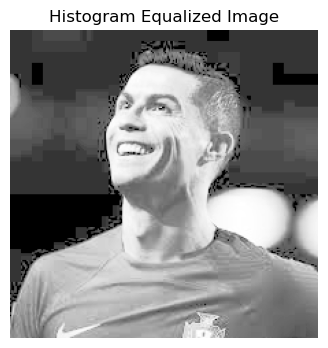

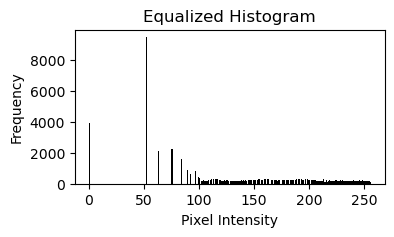

In [25]:
#Histogram Equalization
img_eq = cv2.equalizeHist(img)

# Show equalized image
plt.figure(figsize=(4,4))
plt.imshow(img_eq, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")
plt.show()

# Show histogram after equalization
plt.figure(figsize=(4,2))
plt.hist(img_eq.ravel(), bins=256, range=[0,256], color='black')
plt.title("Equalized Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


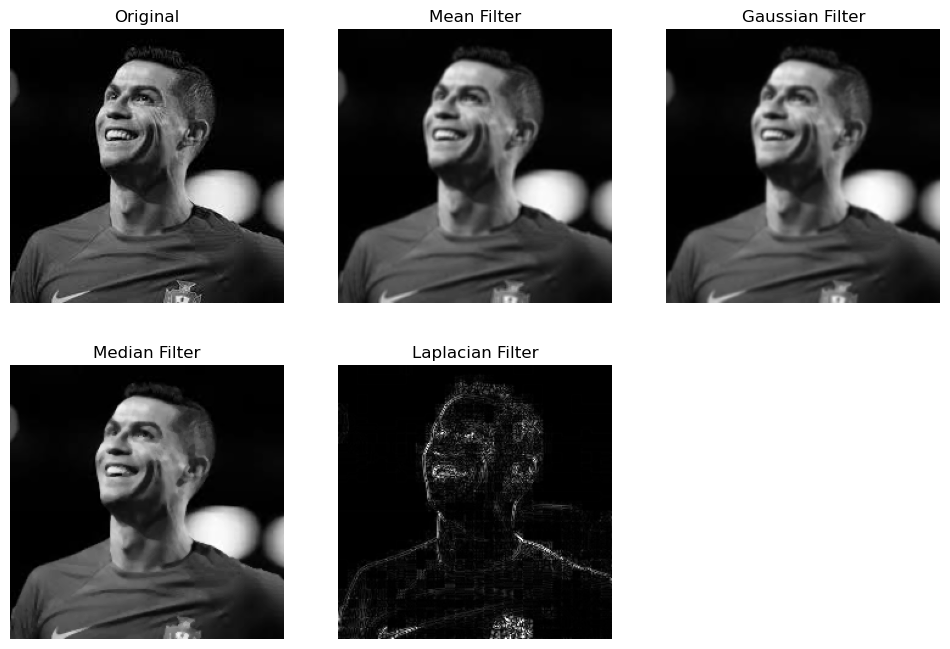

In [29]:
#Spatial Domain Filtering (Smoothing and Sharpening)

# Mean filter (Averaging)
mean_filtered = cv2.blur(img, (3,3))

# Gaussian filter
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 1.0)

# Median filter
median_filtered = cv2.medianBlur(img, 3)

# Laplacian filter (for sharpening / edge enhancement)
laplacian_filtered = cv2.Laplacian(img, cv2.CV_64F)
laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)

# Display results
titles = ["Original", "Mean Filter", "Gaussian Filter", "Median Filter", "Laplacian Filter"]
images = [img, mean_filtered, gaussian_filtered, median_filtered, laplacian_filtered]

plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()


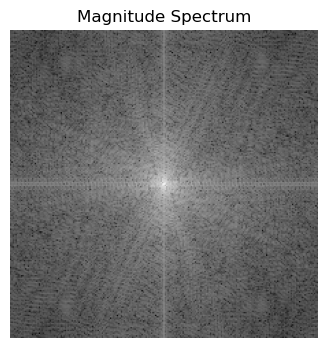

In [33]:

# Frequency Domain Filtering

# Step 1: Fourier Transform
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Magnitude spectrum (for visualization)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.figure(figsize=(4,4))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()


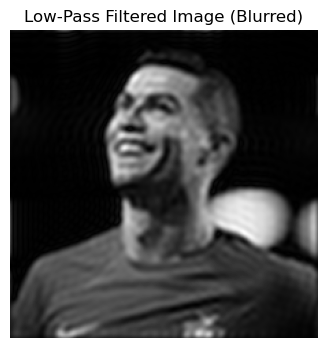

In [37]:
# Low-Pass Filter (LPF) in Frequency Domain

rows, cols = img.shape
crow, ccol = rows//2 , cols//2

# Create a mask with a small square in the center = low pass filter
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30  # cutoff radius
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

# Apply mask
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_lowpass = cv2.idft(f_ishift)
img_lowpass = cv2.magnitude(img_lowpass[:,:,0], img_lowpass[:,:,1])

plt.figure(figsize=(4,4))
plt.imshow(img_lowpass, cmap='gray')
plt.title("Low-Pass Filtered Image (Blurred)")
plt.axis("off")
plt.show()


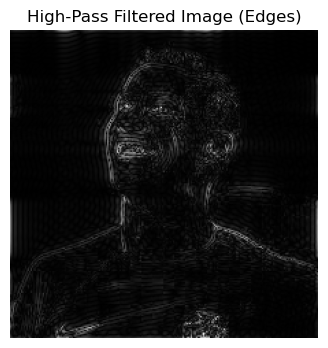

In [41]:
# High-Pass Filter (HPF) in Frequency Domain

# Create a mask with center blacked out (remove low frequencies)
mask = np.ones((rows, cols, 2), np.uint8)
r = 30
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

# Apply mask
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_highpass = cv2.idft(f_ishift)
img_highpass = cv2.magnitude(img_highpass[:,:,0], img_highpass[:,:,1])

plt.figure(figsize=(4,4))
plt.imshow(img_highpass, cmap='gray')
plt.title("High-Pass Filtered Image (Edges)")
plt.axis("off")
plt.show()


In [45]:
#Observations and Results
print(" Histogram equalization improves image contrast by redistributing pixel intensities.")
print(" Spatial filters directly work on pixels: mean/gaussian blur smooths, median removes noise, Laplacian enhances edges.")
print(" Frequency domain filters use Fourier Transform: low-pass removes details (blur), high-pass highlights edges.")
print("Together, these methods show different approaches to image enhancement.")


✅ Histogram equalization improves image contrast by redistributing pixel intensities.
✅ Spatial filters directly work on pixels: mean/gaussian blur smooths, median removes noise, Laplacian enhances edges.
✅ Frequency domain filters use Fourier Transform: low-pass removes details (blur), high-pass highlights edges.
➡ Together, these methods show different approaches to image enhancement.
